<a href="https://colab.research.google.com/github/Aishwarya2k3/Amazon-Sales-Report/blob/main/Amazon_Sales_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data, specifying the correct encoding
df = pd.read_csv('Amazon Sale Report.csv', encoding='latin-1') # Try 'latin-1' encoding. Adjust if necessary.

# Handling missing values
df.fillna(0, inplace=True)  # Example: Replace missing values with 0. Adjust as necessary.

# Convert relevant columns to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

# Handling date conversion
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

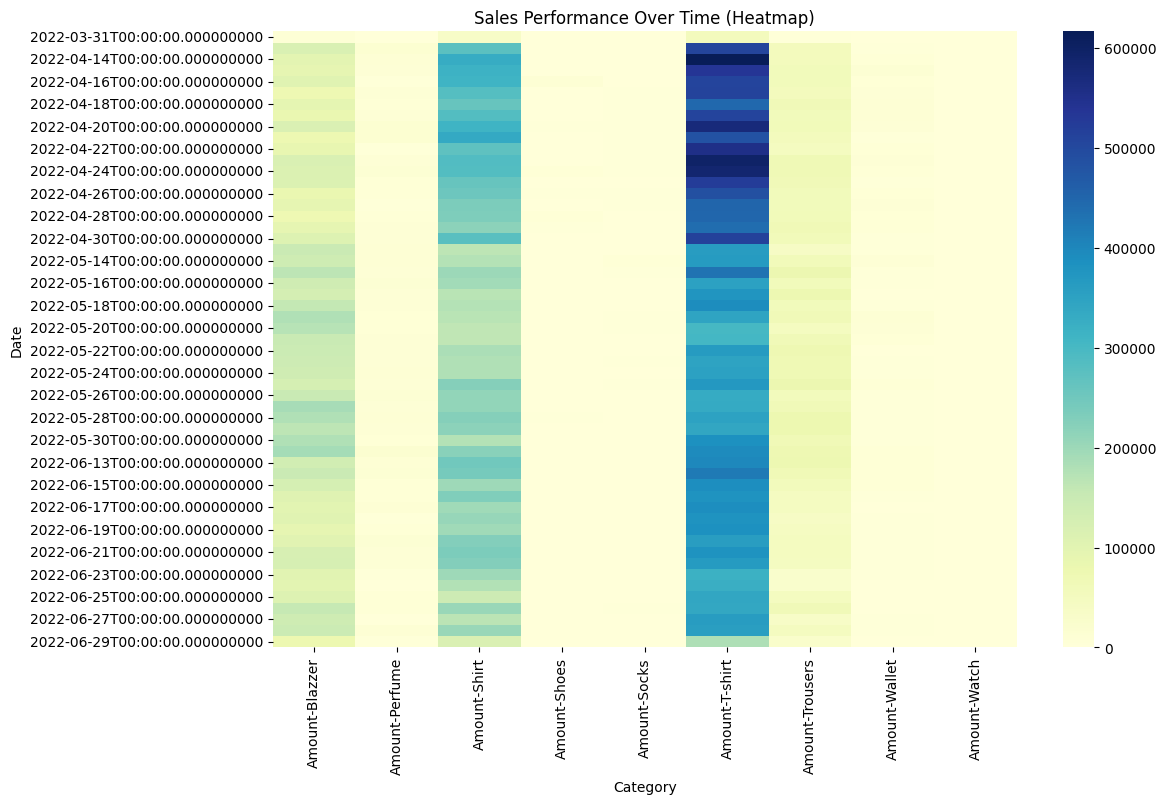

In [ ]:
# Aggregate data by Date and create pivot table for heatmap
sales_overview = df.groupby(['Date', 'Category']).agg({'Amount':'sum'}).unstack().fillna(0)

# Visualizing overall sales performance using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_overview, cmap='YlGnBu', annot=False)
plt.title('Sales Performance Over Time (Heatmap)')
plt.xlabel('Category')
plt.ylabel('Date')
plt.show()


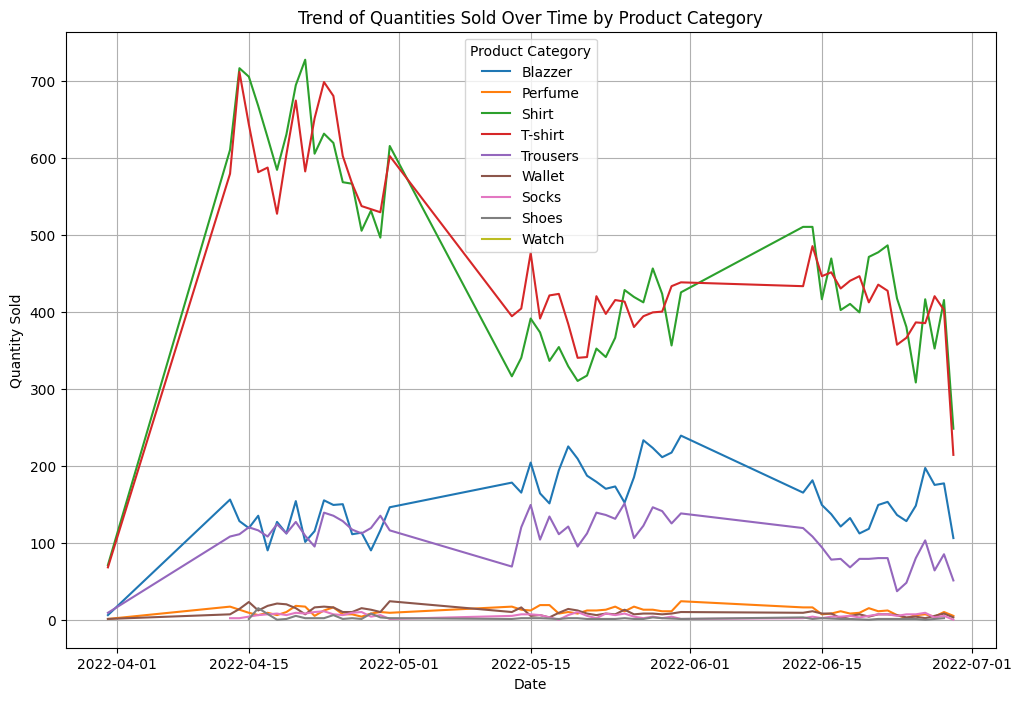

In [ ]:
# Aggregate by Date and Product Category
category_trend = df.groupby(['Date', 'Category']).agg({'Qty': 'sum'}).reset_index()

plt.figure(figsize=(12, 8))
for category in category_trend['Category'].unique():
    category_data = category_trend[category_trend['Category'] == category]
    plt.plot(category_data['Date'], category_data['Qty'], label=category)

plt.title('Trend of Quantities Sold Over Time by Product Category')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()


<ipython-input-12-3e607ecf8946>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution, x='Category', y='Qty', palette='viridis')


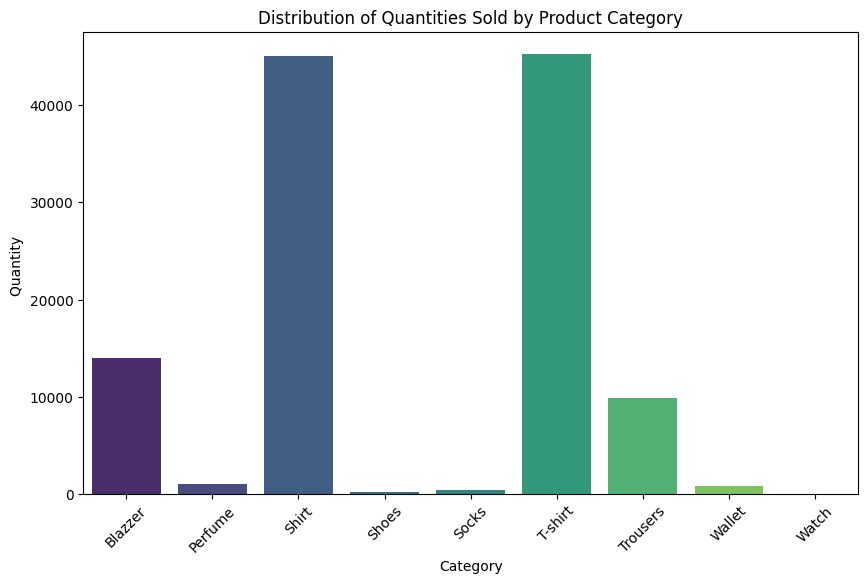

In [ ]:
# Aggregate by Product Category
category_distribution = df.groupby('Category').agg({'Qty': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_distribution, x='Category', y='Qty', palette='viridis')
plt.title('Distribution of Quantities Sold by Product Category')
plt.xlabel('Category')
plt.ylabel('Quantity ')
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-710ae2e9dd69>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_distribution, x='Size', y='Qty', palette='coolwarm')


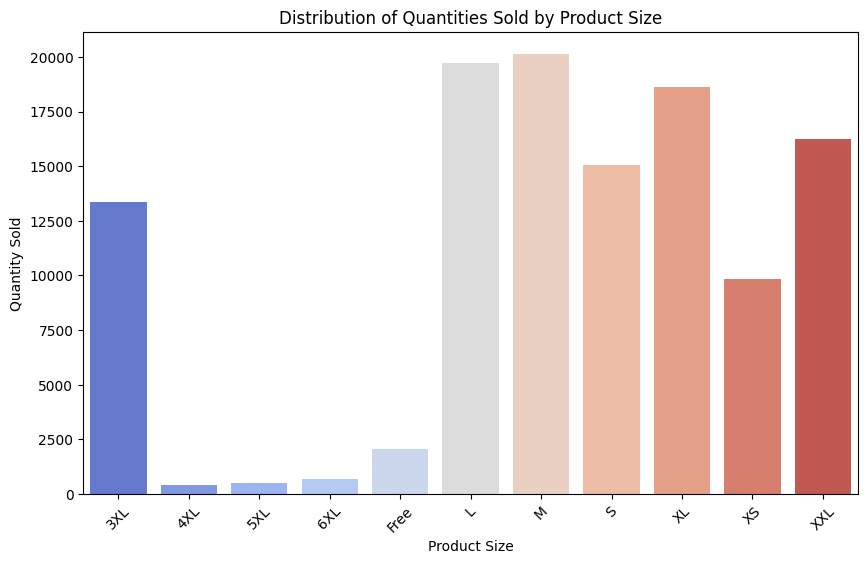

In [ ]:
# Aggregate by Product Size
size_distribution = df.groupby('Size').agg({'Qty': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=size_distribution, x='Size', y='Qty', palette='coolwarm')
plt.title('Distribution of Quantities Sold by Product Size')
plt.xlabel('Product Size')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


<ipython-input-15-4a81c05e2b2a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fulfillment_distribution, x='Fulfilment', y='Order ID', palette='Set2')


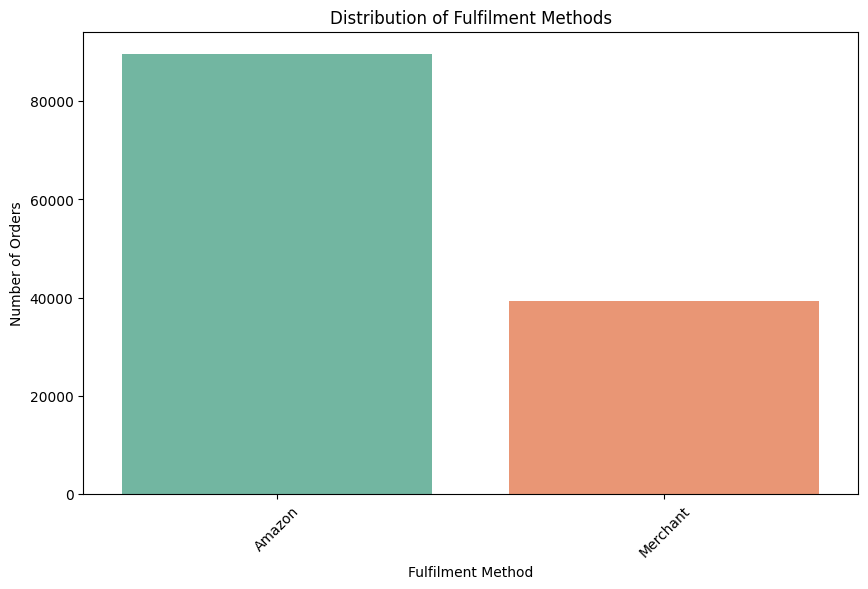

In [ ]:
# Assuming 'Fulfillment Method' is a column in your dataset
fulfillment_distribution = df.groupby('Fulfilment').agg({'Order ID': 'count'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=fulfillment_distribution, x='Fulfilment', y='Order ID', palette='Set2')
plt.title('Distribution of Fulfilment Methods')
plt.xlabel('Fulfilment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


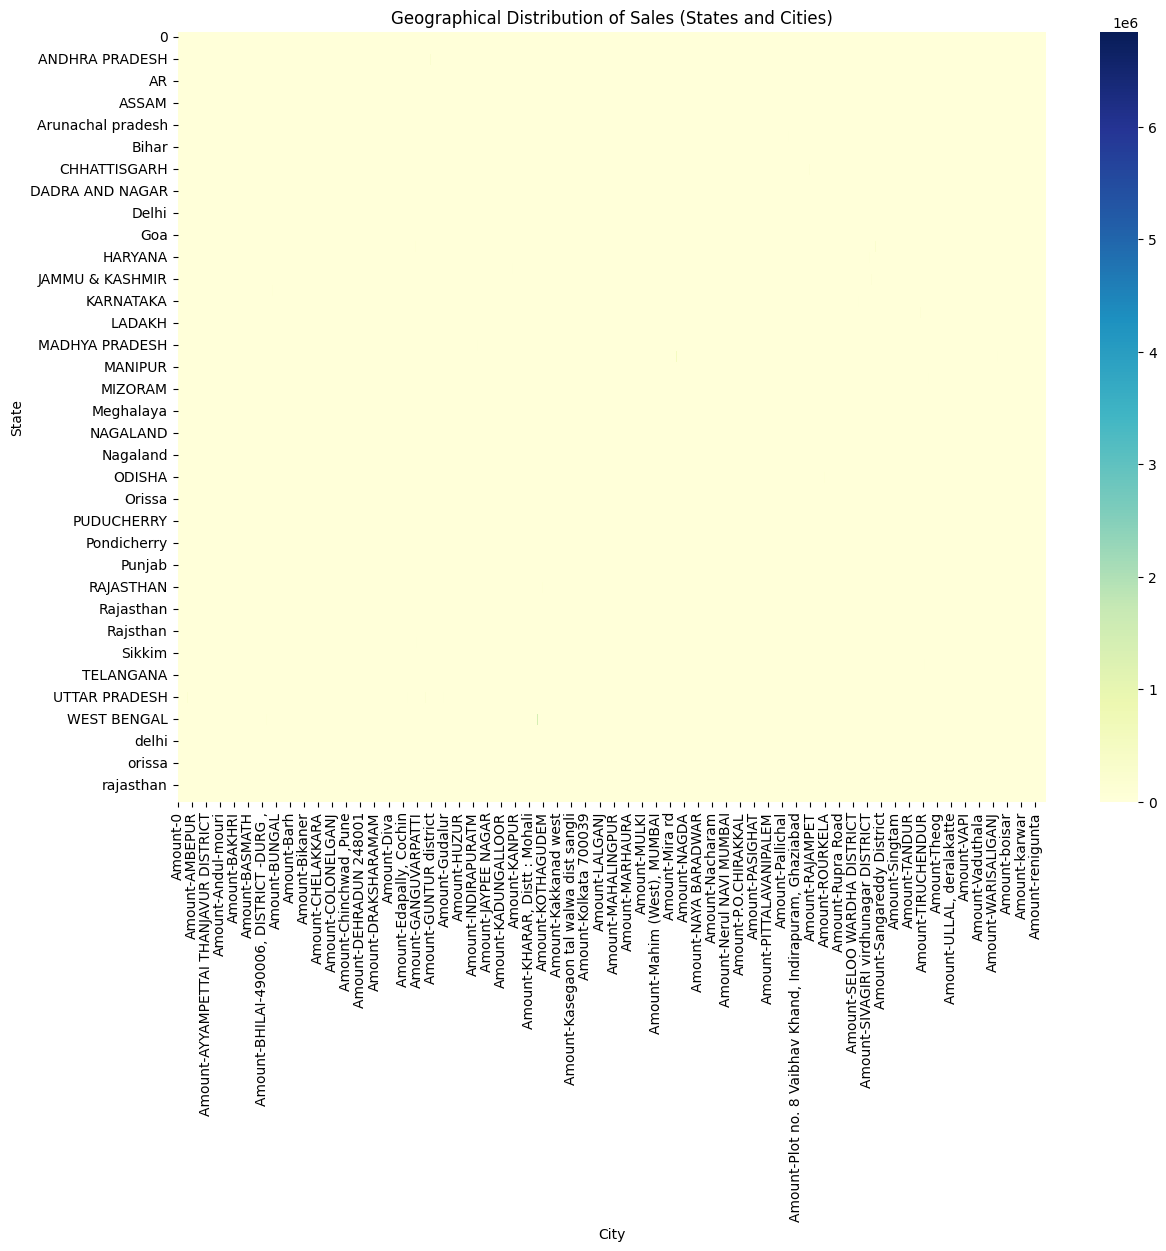

In [ ]:
# Assuming 'State' and 'City' columns exist in the dataframe
state_city_sales = df.groupby(['ship-state', 'ship-city']).agg({'Amount': 'sum'}).unstack().fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(state_city_sales, cmap='YlGnBu', annot=False)
plt.title('Geographical Distribution of Sales (States and Cities)')
plt.xlabel('City')
plt.ylabel('State')
plt.show()


<ipython-input-33-e8fb4f525c05>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='ship-state', y='Amount', palette='viridis')


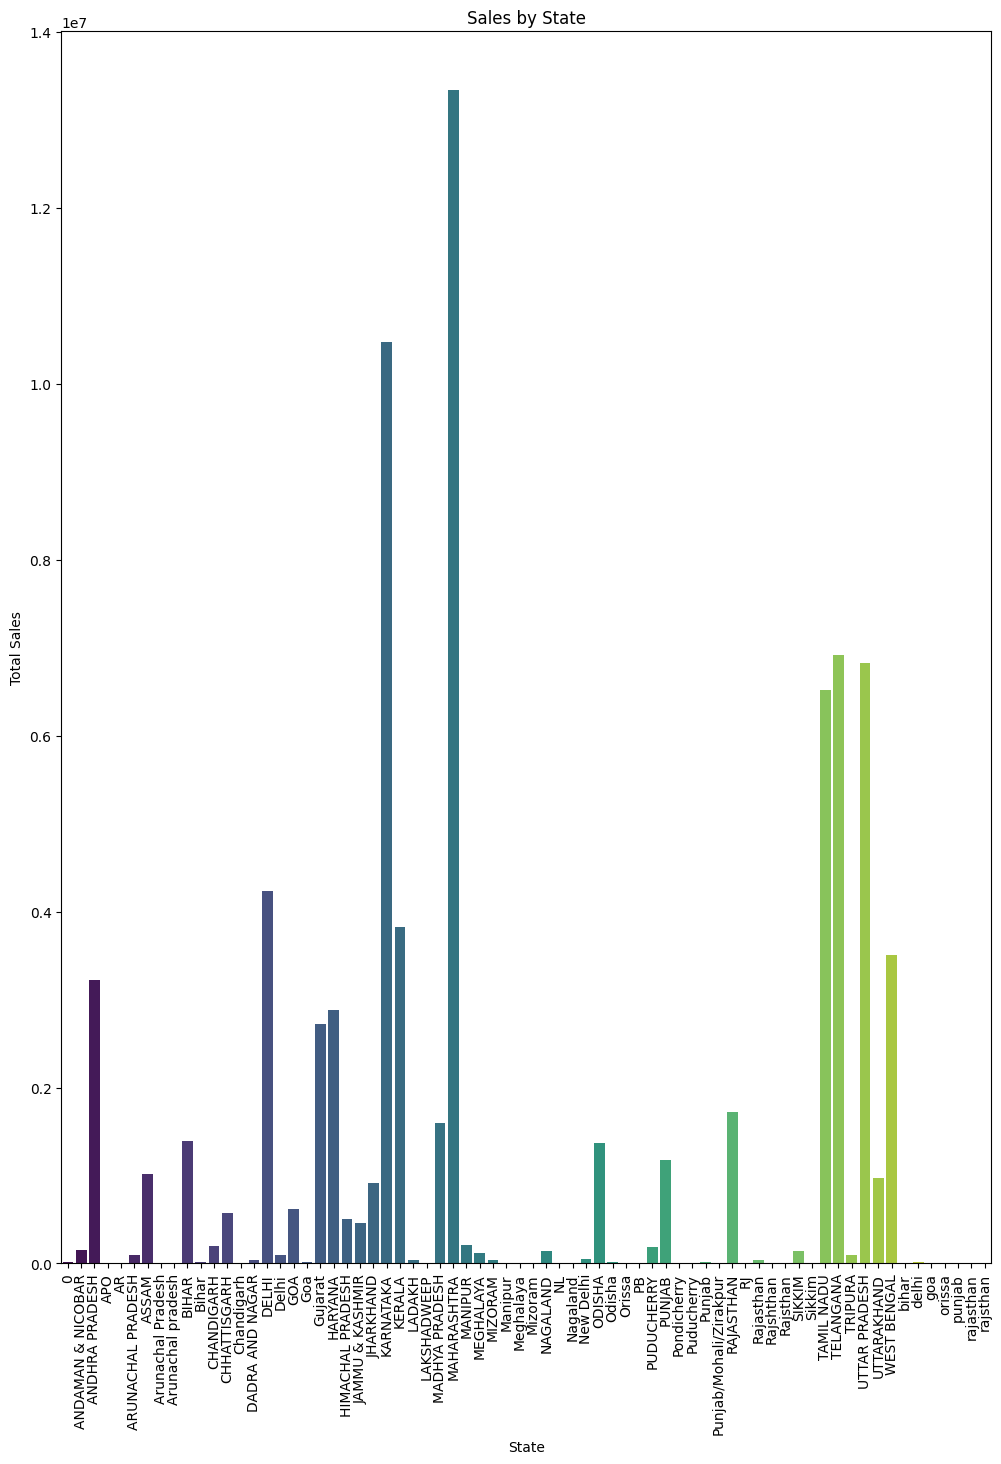

In [ ]:
# Aggregate sales by state
state_sales = df.groupby('ship-state').agg({'Amount': 'sum'}).reset_index()

plt.figure(figsize=(12, 16))
sns.barplot(data=state_sales, x='ship-state', y='Amount', palette='viridis')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

plt.show()


<ipython-input-41-81549a1dba39>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='ship-city', y='Amount', palette='coolwarm')


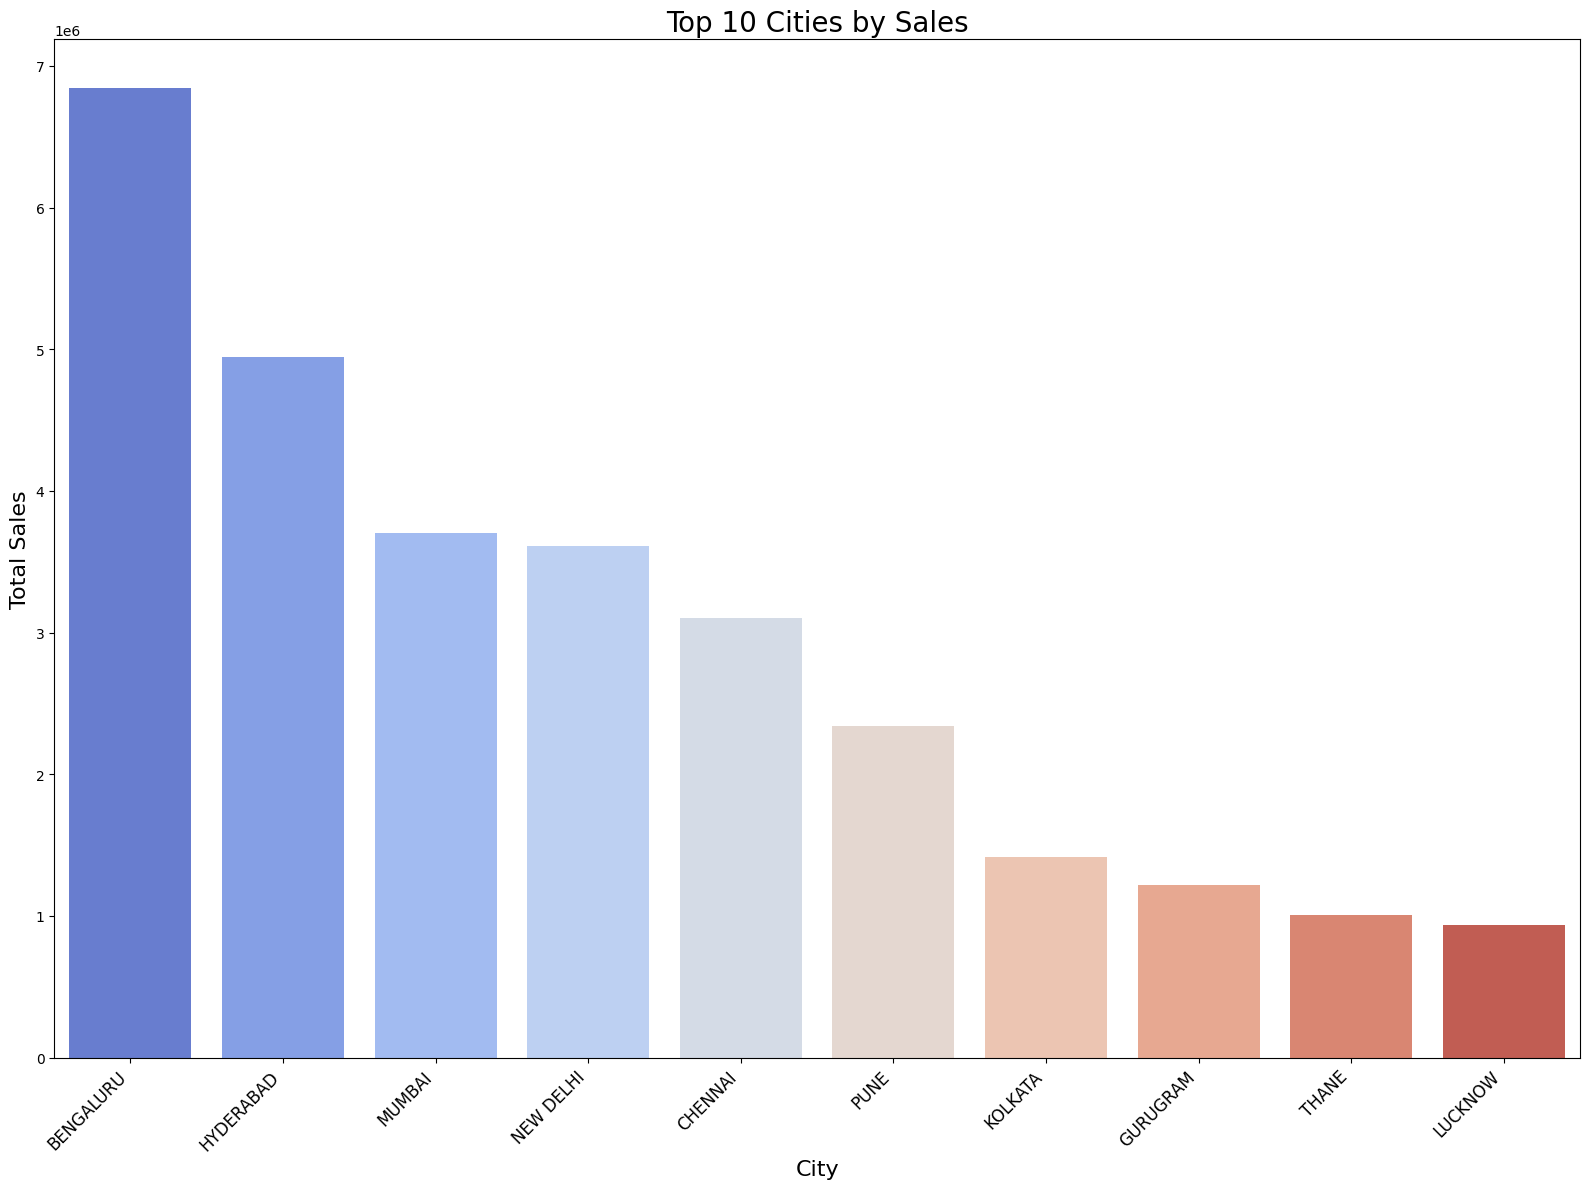

In [ ]:
# Aggregating sales by city
city_sales = df.groupby('ship-city').agg({'Amount': 'sum'}).reset_index()

# Sorting the cities by sales and selecting the top 10
top_cities = city_sales.sort_values(by='Amount', ascending=False).head(10)

# Plotting
plt.figure(figsize=(16, 12))
sns.barplot(data=top_cities, x='ship-city', y='Amount', palette='coolwarm')

# Enhancing the plot
plt.title('Top 10 Cities by Sales', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)

# Adjusting x-axis labels for clarity
plt.xticks(rotation=45, ha='right', fontsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Displaying the plot
plt.show()
